# SUPERVISED ML
## Applying Linear Regression algorithm to predict the score obtained by a student based on number of study hours.

### Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

### Reading the dataset

In [38]:
data = pd.read_csv('student_scores.csv')

In [39]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Analysing the data and checking for null values

In [40]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

### Plotting graph from the data

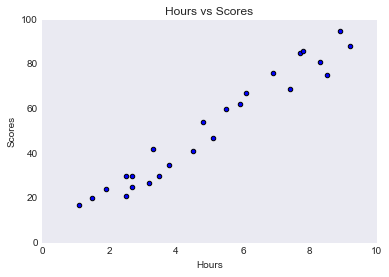

In [42]:
data.plot.scatter(x='Hours', y='Scores')
plt.title('Hours vs Scores')
plt.xlim(0,10)
plt.ylim(0,100)
plt.style.use('seaborn-dark')
plt.show()

### Splitting our data as Independent variable (X) and Dependent variable (y)

In [43]:
X = data.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [44]:
y = data.iloc[:,-1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting our data into training and testing dataset for model training

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [46]:
print(X_train)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [47]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


### Implementing Linear Regression and finding slope , intercept values

In [48]:
regression = LinearRegression()

In [49]:
regression.fit(X_train, y_train)

LinearRegression()

In [50]:
regression.coef_

array([9.78856669])

In [51]:
regression.intercept_

2.370815382341881

### Plotting the Linear Regression graph

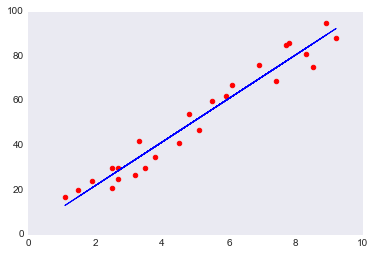

In [52]:
plt.scatter(X, y, color='red')
plt.plot(X, ((regression.coef_ * X) + regression.intercept_))
plt.show()

### Prediction for our test dataset

In [53]:
y_pred=regression.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

### Comparing actual and predicted values

In [54]:
data_compare=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data_compare

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## r2 Testing
The closer the value of R2 is to 1 the better the model fits our data.

In [55]:
r2_score(y_test,y_pred)

0.9568211104435257

### Training and testing dataset scores
As there is not much difference between training and testing dataset, our model is not overfitted.

In [56]:
print("Training score:",regression.score(X_train,y_train))
print("Testing score:",regression.score(X_test,y_test))

Training score: 0.9484997422695115
Testing score: 0.9568211104435257


### Checking predicted score for a student who studies 9.75 hrs / day

In [57]:
hours = 9.75
print('Predicted score : ',regression.predict([[hours]]))

Predicted score :  [97.80934058]


## RESULT
### Predicted score for a student who studied 9.75 hrs / day is *97.8*